In [170]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import (confusion_matrix, 
                             f1_score, 
                             precision_score, 
                             recall_score, 
                             roc_auc_score, 
                             roc_curve, 
                             accuracy_score)
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
from nltk import wordpunct_tokenize, word_tokenize, sent_tokenize
from nltk.stem import WordNetLemmatizer
from collections import Counter


# list of words to be used as stop words
sw = ['u', 'i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', 've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"]

def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()


In [171]:
# import data, look at shape and first few rows
gc_data = pd.read_csv('cd_2011_2020_data.csv')
print(gc_data.shape)
gc_data.head()

(755, 3)


,author,date,text
0,President Russell M. Nelson,2020/04,"My beloved brothers and sisters, as we welcome..."
1,President M. Russell Ballard,2020/04,"Thank you very much, President, for such a won..."
2,Elder James R. Rasband,2020/04,The Book of Mormon Teaches the Doctrine of Chr...
3,Joy D. Jones,2020/04,I’m grateful to focus my remarks today on wome...
4,Elder Neil L. Andersen,2020/04,"Eighteen years after the First Vision, the Pro..."


In [172]:
# subset data to only have talks by Nelson and Monson
nelson_monson_talks = gc_data[gc_data.author.str.contains('Nelson|Monson', regex=True)]
# create target column
nelson_monson_talks["target"] = nelson_monson_talks.author.str.contains('Nelson', regex=True).astype(int)


<ipython-input-172-3b067105fc4e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nelson_monson_talks["target"] = nelson_monson_talks.author.str.contains('Nelson', regex=True).astype(int)


In [165]:
print(nelson_monson_talks.shape)
nelson_monson_talks.head()


(82, 4)


,author,date,text,target
0,President Russell M. Nelson,2020/04,"My beloved brothers and sisters, as we welcome...",1
21,President Russell M. Nelson,2020/04,What a unique and wonderful session this has b...,1
26,President Russell M. Nelson,2020/04,"My dear brothers and sisters, how thankful I a...",1
27,Presented by President Russell M. Nelson,2020/04,"Now, my dear brothers and sisters, as we comme...",1
34,President Russell M. Nelson,2020/04,"My beloved brothers and sisters, as we come to...",1


In [105]:
train, test = train_test_split(nelson_monson_talks, test_size=.3, 
                               stratify=nelson_monson_talks.target, 
                               random_state=419)

y_train = train['target']
y_test = test['target']



In [106]:
tfidf = TfidfVectorizer(min_df=.005, stop_words=sw)
tfidf.fit(train['text'])
print(len(tfidf.get_feature_names()))

X_train = tfidf.transform(train['text'])
X_test = tfidf.transform(test['text'])

nb = MultinomialNB()
nb.fit(X_train, y_train)
yhat = nb.predict(X_test)
y_prob = nb.predict_proba(X_test)[:,1]


6375


In [107]:
print(accuracy_score(y_test, yhat))
print(f1_score(y_test, yhat))

0.96
0.9565217391304348


In [127]:
confusion_matrix(y_test, yhat)

array([[13,  0],
       [ 1, 11]])

In [108]:
nelson_christmas = pd.read_csv('nelson_christmas.csv')
nelson_christmas


,author,data,text
0,Russell M. Nelson,2018/12,"My beloved brothers and sisters, what a treasu..."


In [110]:
nb.predict(tfidf.transform(nelson_christmas['text']))
nelson_christmas_vectorized = tfidf.transform(nelson_christmas['text'])
nb.predict(nelson_christmas_vectorized)
# predicts 1 which is Nelson. Predicts correctly


array([1])

In [85]:
def print_results(results):
    print('BEST PARAMS: {}\n'.format(results.best_params_))

    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, results.cv_results_['params']):
        print('{} (+/-{}) for {}'.format(round(mean, 3), round(std * 2, 3), params))

# Random Forest
rf = RandomForestClassifier(n_jobs=-1)
parameters = {
    'n_estimators': [50, 250, 500],
    'max_depth': [5, 10, 50, 100, None]
}

cv = GridSearchCV(rf, parameters, cv=5)
cv.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=-1),
             param_grid={'max_depth': [5, 10, 50, 100, None],
                         'n_estimators': [50, 250, 500]})

In [86]:
print_results(cv)


BEST PARAMS: {'max_depth': 100, 'n_estimators': 500}

0.894 (+/-0.268) for {'max_depth': 5, 'n_estimators': 50}
0.897 (+/-0.27) for {'max_depth': 5, 'n_estimators': 250}
0.914 (+/-0.156) for {'max_depth': 5, 'n_estimators': 500}
0.844 (+/-0.223) for {'max_depth': 10, 'n_estimators': 50}
0.897 (+/-0.169) for {'max_depth': 10, 'n_estimators': 250}
0.895 (+/-0.256) for {'max_depth': 10, 'n_estimators': 500}
0.879 (+/-0.213) for {'max_depth': 50, 'n_estimators': 50}
0.897 (+/-0.169) for {'max_depth': 50, 'n_estimators': 250}
0.914 (+/-0.216) for {'max_depth': 50, 'n_estimators': 500}
0.844 (+/-0.192) for {'max_depth': 100, 'n_estimators': 50}
0.929 (+/-0.212) for {'max_depth': 100, 'n_estimators': 250}
0.93 (+/-0.171) for {'max_depth': 100, 'n_estimators': 500}
0.774 (+/-0.223) for {'max_depth': None, 'n_estimators': 50}
0.897 (+/-0.199) for {'max_depth': None, 'n_estimators': 250}
0.879 (+/-0.237) for {'max_depth': None, 'n_estimators': 500}


In [124]:
rf = RandomForestClassifier(max_depth=100, n_estimators=500, n_jobs=-1)
rf.fit(X_train, y_train)
yhatrf = (rf.predict(X_test))
print(accuracy_score(y_test, yhatrf))
print(f1_score(y_test, yhatrf))

0.92
0.9090909090909091


In [129]:
confusion_matrix(y_test, yhatrf)


array([[13,  0],
       [ 2, 10]])

In [122]:
rf.predict(nelson_christmas_vectorized)

array([1])

In [113]:
ada = AdaBoostClassifier()
parameters = {
    'n_estimators': [50, 300, 500],
    'learning_rate': [.5, 1,10]
}
cv = GridSearchCV(ada, parameters, cv=5)
cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=AdaBoostClassifier(),
             param_grid={'learning_rate': [0.5, 1, 10],
                         'n_estimators': [50, 300, 500]})

In [114]:
print_results(cv)


BEST PARAMS: {'learning_rate': 1, 'n_estimators': 500}

0.824 (+/-0.2) for {'learning_rate': 0.5, 'n_estimators': 50}
0.911 (+/-0.115) for {'learning_rate': 0.5, 'n_estimators': 300}
0.929 (+/-0.135) for {'learning_rate': 0.5, 'n_estimators': 500}
0.892 (+/-0.268) for {'learning_rate': 1, 'n_estimators': 50}
0.911 (+/-0.282) for {'learning_rate': 1, 'n_estimators': 300}
0.947 (+/-0.144) for {'learning_rate': 1, 'n_estimators': 500}
0.717 (+/-0.34) for {'learning_rate': 10, 'n_estimators': 50}
0.717 (+/-0.34) for {'learning_rate': 10, 'n_estimators': 300}
0.698 (+/-0.364) for {'learning_rate': 10, 'n_estimators': 500}


In [117]:
# I experimented a bit with the learning rate and number of estimators. 
# If you have a lot of estimators or lower the learning rate a bit the
# performance becomes as good as the MultinomialNB model.

ada = AdaBoostClassifier(learning_rate=1, n_estimators=500)
ada.fit(X_train, y_train)
yhatada = (ada.predict(X_test))
print(accuracy_score(y_test, yhatada))
print(f1_score(y_test, yhatada))

0.92
0.9166666666666666


In [131]:
confusion_matrix(y_test, yhatada)


array([[12,  1],
       [ 1, 11]])

In [94]:
ada.predict(nelson_christmas_vectorized)


array([1])

In [173]:
wn = WordNetLemmatizer()


def process_text(x):
    x = x.lower()
    tokens = wordpunct_tokenize(x)
    tokens = [tok for tok in tokens if tok.isalnum()]
    tokens = [tok for tok in tokens if tok not in sw]
    tokens = [wn.lemmatize(tok) for tok in tokens]
    return " ".join(tokens)

nelson_monson_talks["processed_text"] = nelson_monson_talks.text.apply(process_text)


<ipython-input-173-d8f5c8f9c576>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nelson_monson_talks["processed_text"] = nelson_monson_talks.text.apply(process_text)


In [96]:
train, test = train_test_split(nelson_monson_talks, test_size=.3, 
                               stratify=nelson_monson_talks.target, 
                               random_state=419)

y_train = train['target']
y_test = test['target']

In [97]:
tfidf = TfidfVectorizer(min_df=.005, stop_words=sw)
tfidf.fit(train['processed_text'])
print(len(tfidf.get_feature_names()))

X_train = tfidf.transform(train['processed_text'])
X_test = tfidf.transform(test['processed_text'])

nb = MultinomialNB()
nb.fit(X_train, y_train)
yhat = nb.predict(X_test)
y_prob = nb.predict_proba(X_test)[:,1]

5776


In [98]:
print(accuracy_score(y_test, yhat))
print(f1_score(y_test, yhat))

0.96
0.9565217391304348


In [99]:
rf = RandomForestClassifier(max_depth=50, n_estimators=500, n_jobs=-1)
rf.fit(X_train, y_train)
yhatrf = (rf.predict(X_test))
print(accuracy_score(y_test, yhatrf))
print(f1_score(y_test, yhatrf))


0.88
0.8571428571428571


In [100]:
ada = AdaBoostClassifier(learning_rate=.8, n_estimators=9000)
ada.fit(X_train, y_train)
yhatada = (ada.predict(X_test))
print(accuracy_score(y_test, yhatada))
print(f1_score(y_test, yhatada))

0.96
0.9565217391304348


In [277]:
from wordcloud import WordCloud
from PIL import Image    # to import the image
moroni_mask = np.array(Image.open("moroni.png"))
temp_mask = np.array(Image.open("temp-logo.png"))


def process_text_no_join(x):
    x = x.lower()
    tokens = wordpunct_tokenize(x)
    tokens = [tok for tok in tokens if tok.isalnum()]
    tokens = [tok for tok in tokens if tok not in sw]
    tokens = [wn.lemmatize(tok) for tok in tokens]
    return tokens

# Create a list of word
monson = nelson_monson_talks[nelson_monson_talks.target == 0]
nelson = nelson_monson_talks[nelson_monson_talks.target == 1]


all_nelson_text = nelson.text.str.cat(sep=' ')
all_monson_text = monson.text.str.cat(sep=' ')


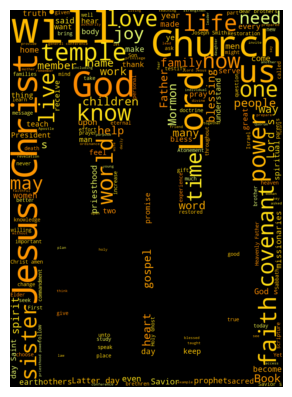

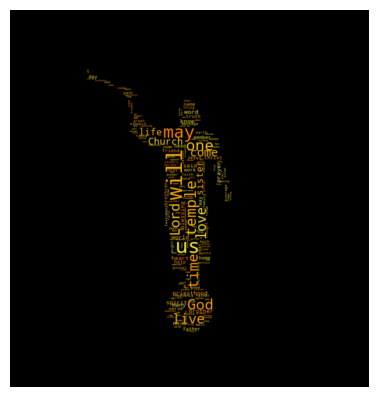

In [278]:
# Create the wordcloud object
from matplotlib.pyplot import figure
bc="black"
wordcloud_nelson = WordCloud(mask=temp_mask, width=480, height=900, margin=0, background_color=bc, colormap="Wistia_r").generate(all_nelson_text)
wordcloud_monson = WordCloud(mask=moroni_mask, width=480, height=480, margin=0, background_color=bc, colormap="Wistia_r").generate(all_monson_text)


# Display the generated image:
figure(num=1, figsize=(5, 5), dpi=100, facecolor='w', edgecolor='k')
plt.imshow(wordcloud_nelson, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
# plt.savefig('nelson_wordcloud.png', bbox_inches='tight', pad_inches=0, dpi=1000)
plt.show()

figure(num=1, figsize=(5, 5), dpi=100, facecolor='w', edgecolor='k')
plt.imshow(wordcloud_monson, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
# plt.savefig('monson_wordcloud.png', bbox_inches='tight', pad_inches=0, dpi=1000)
plt.show()


In [214]:
c = Counter(process_text_no_join(all_nelson_text)) 
wc_nelson = pd.DataFrame(c.items(), columns=['word','count'])
wc_nelson.sort_values(by='count',ascending=False).head(10)



,word,count
152,god,371
92,lord,333
11,christ,315
9,church,311
10,jesus,286
76,life,239
94,u,231
13,day,221
69,temple,191
129,power,165


In [215]:
c = Counter(process_text_no_join(all_monson_text)) 
wc_monson = pd.DataFrame(c.items(), columns=['word','count'])
wc_monson.sort_values(by='count',ascending=False).head(10)

,word,count
96,u,395
302,may,240
80,life,233
1,brother,212
18,one,200
10,god,200
162,temple,194
196,time,181
142,lord,180
65,day,145
